In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

**Loading previously cleaned datset**

In [2]:
df = pd.read_csv("churn_data_modified.csv")

In [3]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport#Yes,StreamingTV#No,StreamingTV#No internet service,StreamingTV#Yes,StreamingMovies#No,StreamingMovies#No internet service,StreamingMovies#Yes,Contract#Month-to-month,Contract#One year,Contract#Two year
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,1,0,0,1,0,0,0,1,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,0,1,0,0,1,0,0


In [4]:
df.shape

(7032, 41)

In [5]:
count_no_churn = (df['Churn'] == 0).sum()
print("Number of customers who didn't churn:",count_no_churn)
count_yes_churn = (df['Churn']==1).sum()
print("Number of customers who churnes:",count_yes_churn)
pct_of_no_churn = count_no_churn/(count_no_churn+count_yes_churn)
print("percentage of customers who didn't churn:", pct_of_no_churn*100)
pct_of_yes_churn = count_yes_churn/(count_no_churn+count_yes_churn)
print("percentage of customers who churned:", pct_of_yes_churn*100)

Number of customers who didn't churn: 5163
Number of customers who churnes: 1869
percentage of customers who didn't churn: 73.42150170648463
percentage of customers who churned: 26.578498293515356


**Splitting Dataset**

In [6]:
X = df.drop("Churn",axis=1)
y = df["Churn"]
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (7032, 40)
Shape of y: (7032,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4922, 40)
Number transactions y_train dataset:  (4922,)
Number transactions X_test dataset:  (2110, 40)
Number transactions y_test dataset:  (2110,)


**Oversamplying minority class with SMOTE**

In [8]:
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (7216, 40)
After OverSampling, the shape of train_y: (7216,) 

After OverSampling, counts of label '1': 3608
After OverSampling, counts of label '0': 3608


**FITTING DIFFERENT MODELS**

In [9]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [10]:
models = [('knn', KNN), 
          ('logistic', LogisticRegression),
          ('tree', DecisionTreeClassifier),
          ('forest', RandomForestClassifier)
         ]

param_choices = [
    {
        'n_neighbors': range(1, 12)
    },
    {
        'C': np.logspace(-3,6, 12),
        'penalty': ['l1', 'l2']
    },
    {
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10],
        'max_features': ['auto', 'sqrt', 'log2'],
        'criterion' :['gini', 'entropy']
    }
]

grids = {}
for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params,scoring="recall")
    grid.fit(X_train_res, y_train_res)
    s = f"{name}: best score: {grid.best_score_}"
    print(s)
    g= f"{name}: best param: {grid.best_params_}"
    print(g)
    grids[name] = grid

knn: best score: 0.8558715388368725
knn: best param: {'n_neighbors': 1}
logistic: best score: 0.8270453855640636
logistic: best param: {'C': 151991.10829529332, 'penalty': 'l2'}
tree: best score: 0.8461762479781466
tree: best param: {'max_depth': 1, 'min_samples_leaf': 3}
forest: best score: 0.8761027504888947
forest: best param: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 200}


**RANDOM FORESTS**

**Fitting Randon Forest Model with best parameters** 

In [11]:
rfc_best=RandomForestClassifier(random_state=42, max_depth=5, max_features='auto',n_estimators= 200,criterion='gini',min_samples_leaf=3)

In [12]:
rfc_best.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [13]:
y_pred_rfc=rfc_best.predict(X_test)

**Evaluating Random Forest Model**

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix_forest = confusion_matrix(y_test, y_pred_rfc,labels=(1,0))
print(confusion_matrix_forest)

[[ 432  123]
 [ 368 1187]]


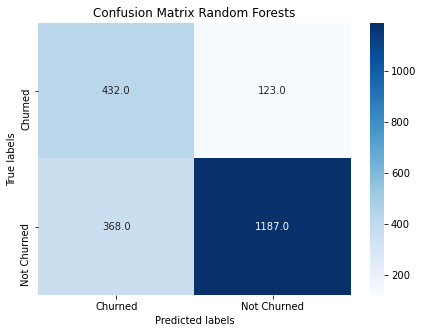

In [15]:
import seaborn as sns

#plotting a confusion matrix
labels = ['Churned','Not Churned']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_forest,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Random Forests'); 

In [16]:
def report(c_mat):
    TP=c_mat[0][0]
    FN=c_mat[0][1]
    FP=c_mat[1][0]
    TN=c_mat[1][1]
    print("accuracy =",((TP+TN)/(TP+TN+FN+FP)))
    print("Recall =",(TP/(TP+FN)))
    print("Precision =",(TP/(TP+FP)))

In [17]:
report(confusion_matrix_forest)

accuracy = 0.7672985781990521
Recall = 0.7783783783783784
Precision = 0.54


**Printing the Classification Report**

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc)) 

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1555
           1       0.54      0.78      0.64       555

    accuracy                           0.77      2110
   macro avg       0.72      0.77      0.73      2110
weighted avg       0.81      0.77      0.78      2110



**Calculating Area Under the Curve**

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
y_pred_rfc=rfc_best.predict(X_test)
y_score_rfc = rfc_best.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score_rfc)
roc_auc_forests = auc(fpr, tpr)
print(roc_auc_forests)

0.840199298977434


In [20]:
roc_auc_score(y_test,rfc_best.predict_proba(X_test)[:,1])

0.840199298977434

**LOGISTIC REGRESSION** 

**Fitting Logistic Regression with best parameters**

In [21]:
best_lr1 = LogisticRegression(C=1.873817422860385,penalty='l2')
best_lr1.fit(X_train_res, y_train_res)

LogisticRegression(C=1.873817422860385, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
from sklearn.metrics import confusion_matrix
y_pred_log = best_lr1.predict(X_test)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log,labels=(1,0))
print(confusion_matrix_log)

[[ 344  211]
 [ 270 1285]]


In [23]:
report(confusion_matrix_log)

accuracy = 0.7720379146919432
Recall = 0.6198198198198198
Precision = 0.5602605863192183


**Printiong the Classification Report**

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log)) 

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1555
           1       0.56      0.62      0.59       555

    accuracy                           0.77      2110
   macro avg       0.71      0.72      0.72      2110
weighted avg       0.78      0.77      0.78      2110



**Plotting the Confusion Matrix**

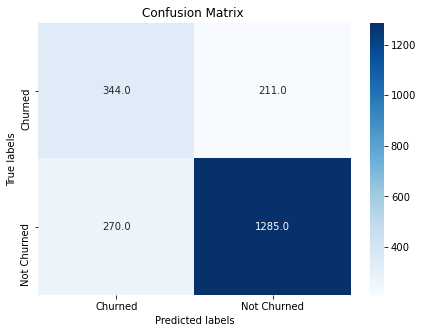

In [25]:
import seaborn as sns
labels = ['Churned','Not Churned']

plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_log,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix ');


**AUC Curves for Logistic Regression**

Text(0, 0.5, 'True Positive Rate')

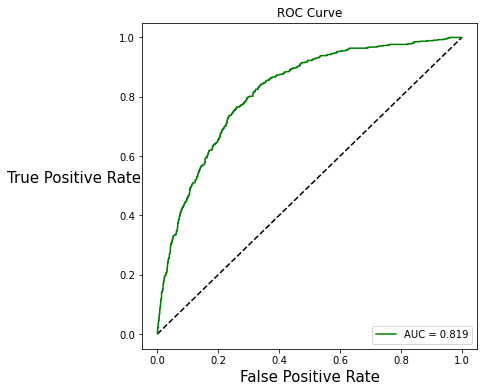

In [26]:
logit_roc_auc = roc_auc_score(y_test, best_lr1.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, best_lr1.predict_proba(X_test)[:,1])

roc_auc = auc(fpr,tpr)

plt.figure(figsize=(6,6))
# Plotting our Baseline..
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, 'g',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate',fontsize = 15)
plt.ylabel('True Positive Rate',rotation=0,labelpad=45,fontsize = 15)


**Finding the tpr and fpr for the optimal threshold**

In [27]:
pd.set_option('display.max_rows', 500)
cutoff_list = pd.DataFrame(np.column_stack([tpr, fpr, thresholds]), 
                               columns=['tpr', 'fpr', 'thresholds'])
cutoff_list

,tpr,fpr,thresholds
0,0.000000,0.000000,1.943982
1,0.001802,0.000000,0.943982
2,0.009009,0.000000,0.937757
3,0.009009,0.000643,0.935772
4,0.010811,0.000643,0.935240
...,...,...,...
607,0.996396,0.953698,0.003547
608,0.998198,0.953698,0.003541
609,0.998198,0.958842,0.003433
610,1.000000,0.958842,0.003299


**Finding the Optimal Threshold**

In [28]:
# print the first 10 predicted probabilities of class membership
best_lr1.predict_proba(X_test)[0:10]

array([[0.3741386 , 0.6258614 ],
       [0.68440438, 0.31559562],
       [0.47546184, 0.52453816],
       [0.39180348, 0.60819652],
       [0.1349291 , 0.8650709 ],
       [0.73977581, 0.26022419],
       [0.79711527, 0.20288473],
       [0.12712839, 0.87287161],
       [0.46231459, 0.53768541],
       [0.57679308, 0.42320692]])

2 response classes there 2 columns

column 0: predicted probability that each observation is a member of class 0 
column 1: predicted probability that each observation is a member of class 1 

**Importance of predicted probabilities**

We can rank observations by probability of a customer churning

Prioritize contacting those with a higher probability

**There is a 0.5 classification threshold**

Class 1 is predicted if probability > 0.5

Class 0 is predicted if probability < 0.5

In [29]:
# store the predicted probabilities for class 1 (ie customer will churn)
y_pred_prob = best_lr1.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

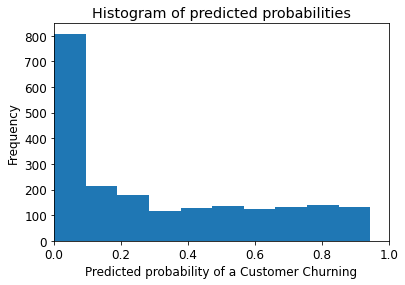

In [31]:
#Plot predicted probablities for class1
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12
plt.hist(y_pred_prob)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of a Customer Churning')
plt.ylabel('Frequency')

**Observation**

1.Most of observations have probability from between 0.1 and 0.2

2.Small number of observations with probability > 0.5

3.Most would be predicted "no churners" in this case

**Solution**

1.Decrease the threshold for predicting churners

2.Increase the recall of the classifier.More sensitive to customers who churn.

In [32]:
# predict churners if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.3 and 0 otherwise
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [33]:
y_pred_prob

array([0.6258614 , 0.31559562, 0.52453816, ..., 0.2095138 , 0.00743287,
       0.0059963 ])

In [34]:
y_pred_class[0:10]

array([1., 1., 1., 1., 1., 0., 0., 1., 1., 1.])

**Confusion Matrix with Optimal Threshold**

In [35]:
from sklearn.metrics import classification_report, confusion_matrix  
cm_optimal_threshold=confusion_matrix(y_test, y_pred_class,labels=(1,0))
print(cm_optimal_threshold)

[[ 437  118]
 [ 453 1102]]


In [36]:
report(cm_optimal_threshold)

accuracy = 0.7293838862559242
Recall = 0.7873873873873873
Precision = 0.4910112359550562


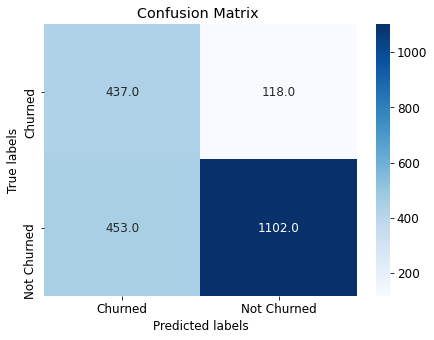

In [37]:
import seaborn as sns
labels = ['Churned','Not Churned']

plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm_optimal_threshold,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix ');

**KNN  MODEL**

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
# define the parameter values that should be searched
k_range = list(range(1, 100))

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='recall')

# scalarizing X_train and X_test
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

#fit the grid
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [39]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.5912502891510524
{'n_neighbors': 71}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=71, p=2,
                     weights='uniform')


In [40]:
# train your model using all data and the best known parameters
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors=71, weights='uniform')
knn.fit(X_train, y_train)

# make a prediction on out-of-sample data
y_pred_knn=knn.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix  
cm_knn=confusion_matrix(y_test, y_pred_knn,labels=(1,0))
print(cm_knn)

[[ 308  247]
 [ 218 1337]]


**Printing the Classification Report**

In [42]:
report(cm_knn)

accuracy = 0.7796208530805687
Recall = 0.554954954954955
Precision = 0.5855513307984791


In [43]:
print(classification_report(y_test, y_pred_knn)) 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1555
           1       0.59      0.55      0.57       555

    accuracy                           0.78      2110
   macro avg       0.71      0.71      0.71      2110
weighted avg       0.78      0.78      0.78      2110



**Area Under Curve**

In [44]:
y_pred_knn=knn.predict(X_test)
y_score_knn = knn.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr, tpr)
print(roc_auc_knn)

0.825547347991078


**Plotting the Confusion Matrix**

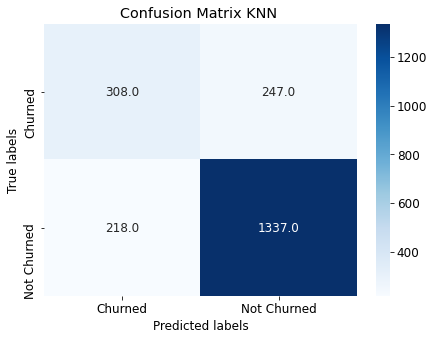

In [45]:
labels = ['Churned','Not Churned']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm_knn,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix KNN ');

**ROC CURVES OF ALL MODELS TRIED**

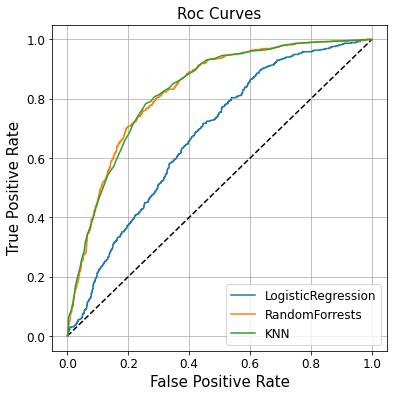

In [46]:
lr_score=best_lr1.predict_proba(X_test)[:,1]
rfc_score = rfc_best.predict_proba(X_test)[:,1]
knn_score = knn.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr,_ = roc_curve(y_test, lr_score)
rfc_fpr, rfc_tpr,_ = roc_curve(y_test, rfc_score)
knn_fpr, knn_tpr,_ = roc_curve(y_test, knn_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6,6))
plt.subplot(1,1,1)
# Plotting our Baseline..
plt.plot([0,1],[0,1], 'k--')

plt.plot(lr_fpr,lr_tpr, label = 'LogisticRegression')
plt.plot(rfc_fpr,rfc_tpr, label = 'RandomForrests')
plt.plot(knn_fpr,knn_tpr, label = 'KNN')
#plt.plot(l_svm_fpr,l_svm_tpr, label = 'SVM-Linear')

plt.legend()
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize = '15')
plt.ylabel('True Positive Rate', fontsize = '15')
plt.title('Roc Curves', fontsize = '15')
plt.savefig('RocCurve')
